In [185]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
import warnings
warnings.filterwarnings('ignore')

In [186]:
df=pd.read_csv('bgdata_train.csv')

In [187]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [188]:
df_test=pd.read_csv('bgdata_test.csv')

In [189]:
df_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [190]:
df.isna().sum()
df_test.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

replacing the Item weight with mean for na values.

In [191]:
df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [192]:
df['Item_Weight'] = df['Item_Weight'].fillna(np.mean(df['Item_Weight']))

In [193]:
df_test['Item_Weight'] = df_test['Item_Weight'].fillna(np.mean(df_test['Item_Weight']))

In [194]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

There are only 3 outlet sizes hence replacing them with the mode of data

In [195]:
from sklearn.impute import SimpleImputer
mode=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
df['Outlet_Size']=mode.fit_transform(df['Outlet_Size'].values.reshape(-1,1))
df_test['Outlet_Size']=mode.fit_transform(df_test['Outlet_Size'].values.reshape(-1,1))

In [196]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [197]:
df_test.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

Cleaning is almost done in the test and train data for null values.

Checking dtypes for data

In [198]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [199]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

Splitting the cat and num variables to work on them easily.

In [200]:
dfcol=df[['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type']]
dfnum=df[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year','Item_Outlet_Sales']]

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


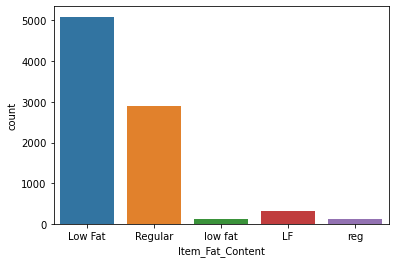

In [201]:
ax = sns.countplot(x = 'Item_Fat_Content', data = dfcol)
print(dfcol['Item_Fat_Content'].value_counts())

As we have the daata of the data here, assuming that the lf, low fat anf reg is Low Fat and Regular, changing the data to just 2 unique values.

In [202]:
def fat(x):
    
    if x == 'LF':
        x = 'Low Fat'
    elif x== 'low fat':
        x='Low Fat'
    elif x == 'reg':
        x = 'Regular'
    else:
        x=x
    return x

df['Item_Fat_Content'] = df['Item_Fat_Content'].apply(lambda x: fat(x))


For test data

In [256]:
def fat(x):
    
    if x == 'LF':
        x = 'Low Fat'
    elif x== 'low fat':
        x='Low Fat'
    elif x == 'reg':
        x = 'Regular'
    else:
        x=x
    return x

df_test['Item_Fat_Content'] = df_test['Item_Fat_Content'].apply(lambda x: fat(x))

In [203]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [204]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

Changed the value now df is only having 2 values in fat content.

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


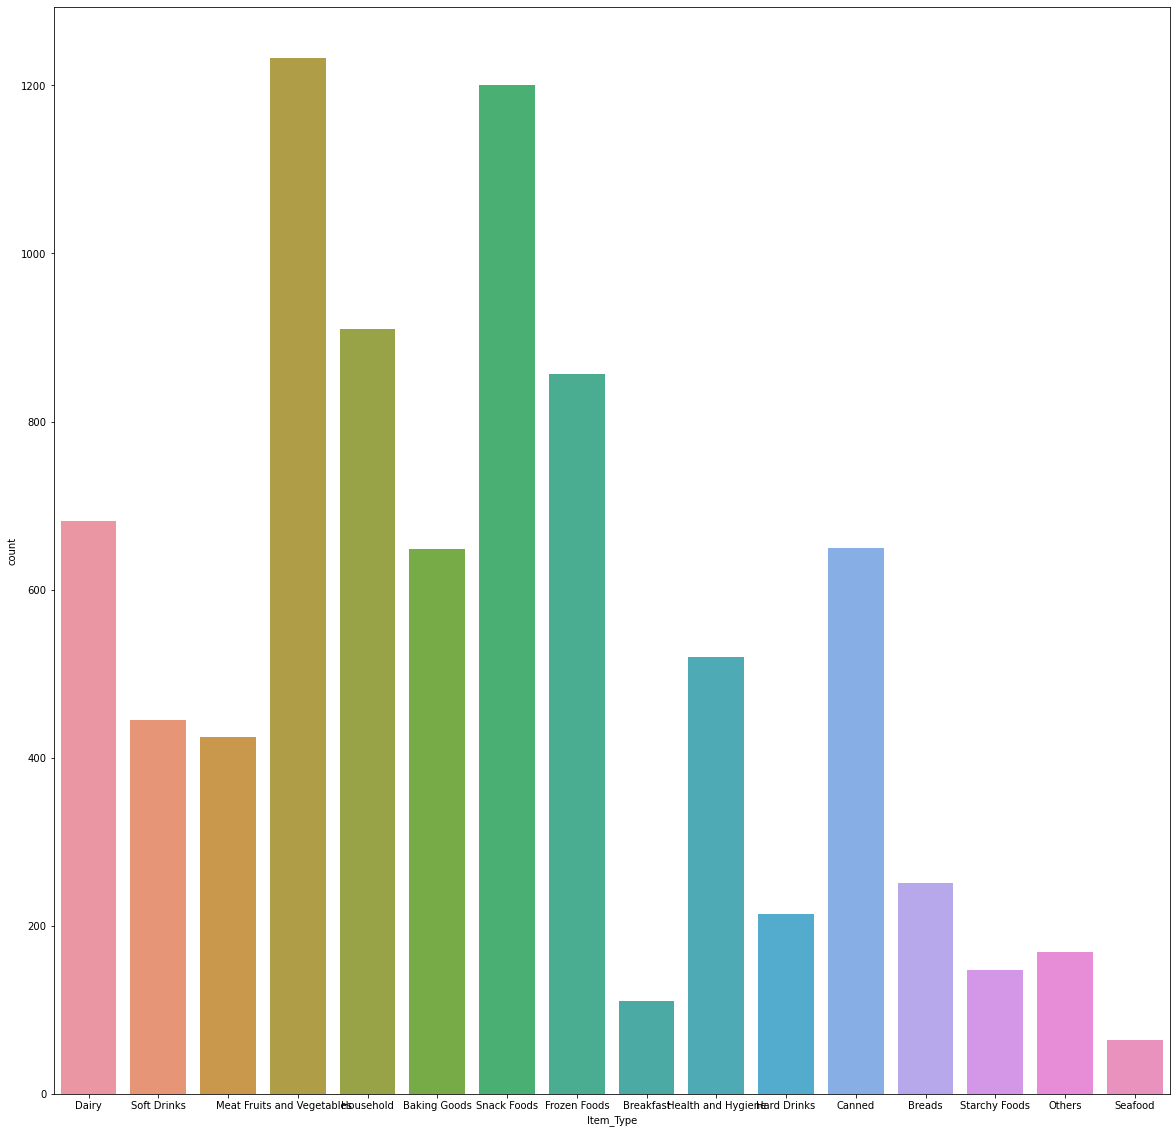

In [205]:
plt.figure(figsize=(20,20))
ax = sns.countplot(x = 'Item_Type', data = dfcol)
print(dfcol['Item_Type'].value_counts())

we have the data of highest selling data and lowest selling data above now.

OUT027    935
OUT013    932
OUT046    930
OUT049    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64


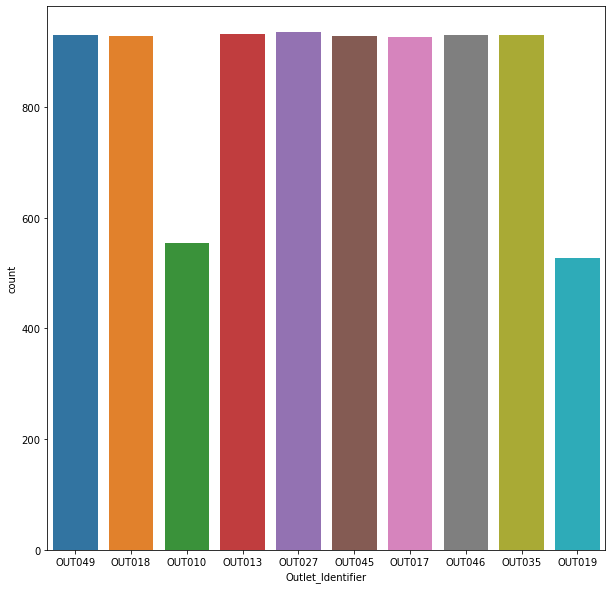

In [206]:
plt.figure(figsize=(10,10))
ax = sns.countplot(x = 'Outlet_Identifier', data = dfcol)
print(dfcol['Outlet_Identifier'].value_counts())

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64


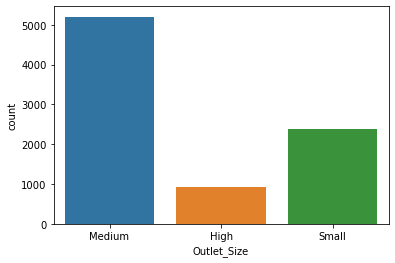

In [207]:

ax = sns.countplot(x = 'Outlet_Size', data = dfcol)
print(dfcol['Outlet_Size'].value_counts())

Medium size outlets are more in number

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64


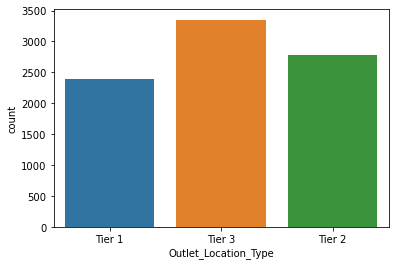

In [208]:
ax = sns.countplot(x = 'Outlet_Location_Type', data = dfcol)
print(dfcol['Outlet_Location_Type'].value_counts())

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64


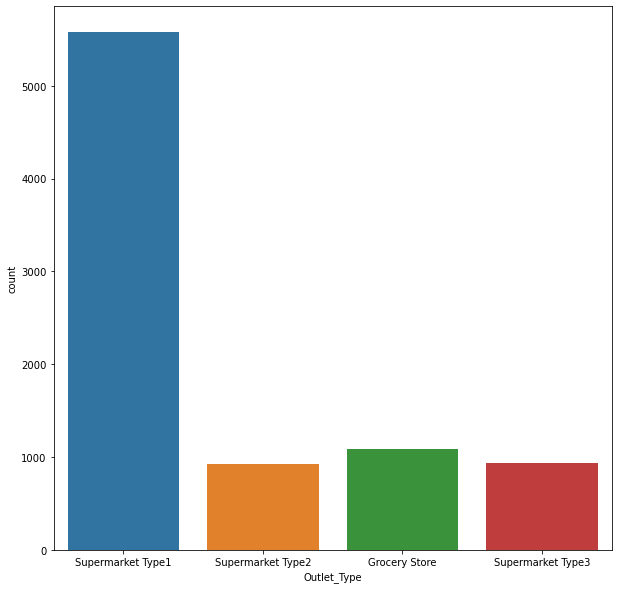

In [209]:
plt.figure(figsize=(10,10))
ax = sns.countplot(x = 'Outlet_Type', data = dfcol)
print(dfcol['Outlet_Type'].value_counts())

FDG33    10
FDW13    10
FDG09     9
FDD38     9
FDF52     9
         ..
FDT35     1
FDQ60     1
FDY43     1
FDK57     1
FDN52     1
Name: Item_Identifier, Length: 1559, dtype: int64


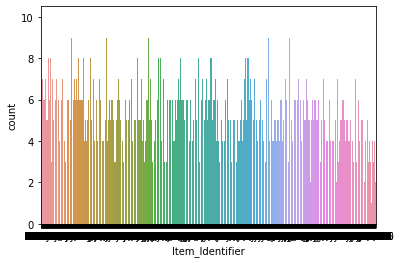

In [210]:
ax = sns.countplot(x = 'Item_Identifier', data = dfcol)
print(dfcol['Item_Identifier'].value_counts())

In [211]:
dfcol.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [212]:
dfnum.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

Here the output variable is item outlet sales, getting the visualisation on the details of the sales in all the columns.

<AxesSubplot:xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

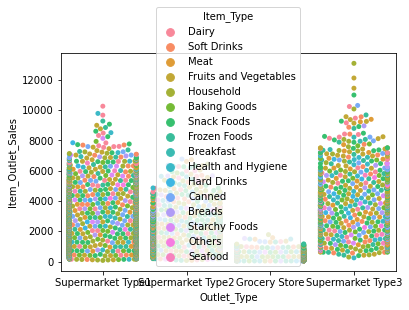

In [213]:
sns.swarmplot(x='Outlet_Type', y='Item_Outlet_Sales', hue='Item_Type' ,data=df)

Looking at this, we can say that Supermarket Type 3 peprforms better in sales.

<AxesSubplot:xlabel='count', ylabel='Outlet_Type'>

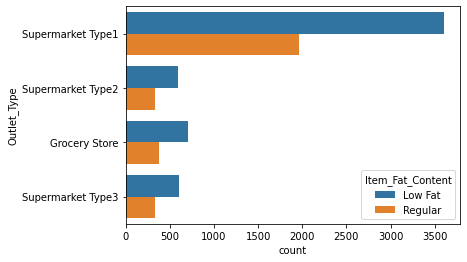

In [214]:
sns.countplot(y='Outlet_Type',hue = 'Item_Fat_Content',data = df)

Low fat contents are performing better irrespective of the outlet types.

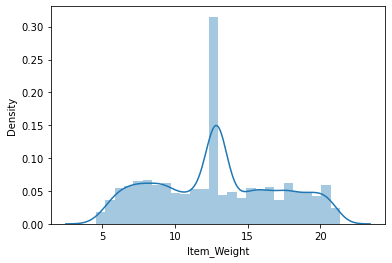

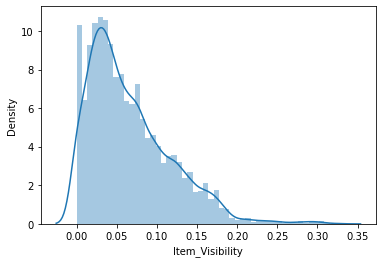

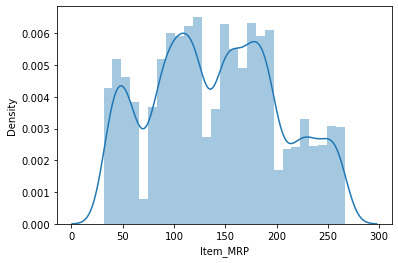

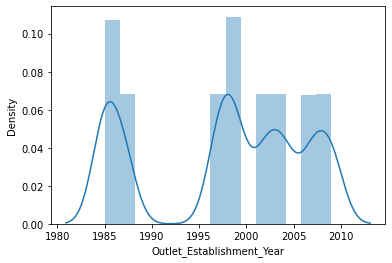

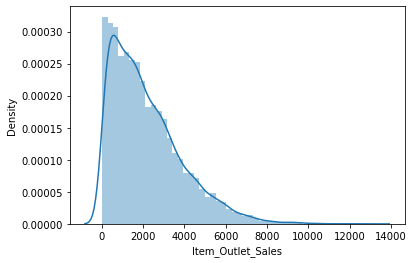

In [215]:
col=['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales']
for i in col:
    sns.distplot(df[i], kde = True)
    plt.show()

In [216]:
df.skew()

Item_Weight                  0.090561
Item_Visibility              1.167091
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales            1.177531
dtype: float64

skew is in op variable hence left the skewness part of the data.

There are few columns which I think will not contribute to the data.

In [257]:
df.drop(['Item_Identifier','Outlet_Identifier'], axis = 1 , inplace= True)
df_test.drop(['Item_Identifier','Outlet_Identifier'], axis = 1 , inplace= True)

In [258]:
df_test

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750000,1.0,0.007565,13.0,107.8622,1999,1.0,0.0,1.0
1,8.300000,4.0,0.038428,4.0,87.3198,2007,1.0,1.0,1.0
2,14.600000,1.0,0.099575,11.0,241.7538,1998,1.0,2.0,0.0
3,7.315000,1.0,0.015388,13.0,155.0340,2007,1.0,1.0,1.0
4,12.695633,2.0,0.118599,4.0,234.2300,1985,1.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...
5676,10.500000,2.0,0.013496,13.0,141.3154,1997,2.0,0.0,1.0
5677,7.600000,2.0,0.142991,15.0,169.1448,2009,1.0,2.0,2.0
5678,10.000000,1.0,0.073529,8.0,118.7440,2002,1.0,1.0,1.0
5679,15.300000,2.0,0.000000,3.0,214.6218,2007,1.0,1.0,1.0


In [218]:
df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.930,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,8.380,Regular,0.046982,Baking Goods,108.1570,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,7.210,Regular,0.145221,Snack Foods,103.1332,2009,Medium,Tier 3,Supermarket Type2,1845.5976


Describe

In [219]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


We arae able to see the max min and mid values of all the columns.

Plotting correlation

<AxesSubplot:>

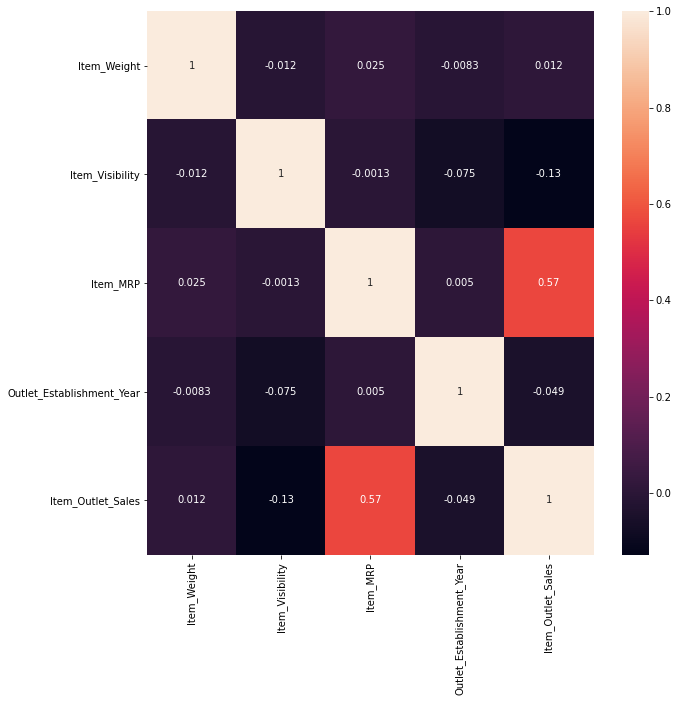

In [220]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

Item_Weight - doesnt contribute much.

Item_Fat_Content - positively correlated with sales

Item_Visibility - negatively correlated, the higher the visibility, the lower the sales will be.

Item_Type - not much info

Item_MRP - The more the MRP, the more will be the sales.

Outlet_Establishment_Year - na

Outlet_Size - na

Outlet_Location_Type - the better the location, more will be sales.

Outlet_Type - same as location types.

Item_Outlet_Sales - na


## Now going ahead with encoding the data.


In [227]:
from sklearn.preprocessing import OrdinalEncoder
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i] = ordi.fit_transform(df[i].values.reshape(-1,1))


For testing data

In [255]:
for i in df_test.columns:
    if df_test[i].dtypes == 'object':
        df_test[i] = ordi.fit_transform(df_test[i].values.reshape(-1,1))

Searching for outliers

In [228]:
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold = 3
print(np.where(z>3))

(array([  49,   83,  108,  130,  145,  174,  276,  304,  333,  373,  434,
        456,  472,  502,  521,  532,  661,  694,  753,  809,  854,  935,
        991,  997, 1009, 1138, 1159, 1254, 1272, 1291, 1311, 1324, 1434,
       1450, 1496, 1501, 1506, 1560, 1575, 1644, 1651, 1805, 1827, 1841,
       1859, 1998, 2088, 2109, 2122, 2216, 2238, 2251, 2293, 2324, 2439,
       2445, 2516, 2535, 2586, 2613, 2728, 2776, 2855, 2895, 3017, 3083,
       3087, 3098, 3154, 3206, 3234, 3286, 3399, 3407, 3458, 3474, 3488,
       3497, 3540, 3667, 3709, 3720, 3750, 3757, 3767, 3884, 3993, 4006,
       4219, 4289, 4346, 4349, 4382, 4408, 4530, 4656, 4674, 4676, 4681,
       4772, 4789, 4888, 4941, 4961, 4991, 5031, 5065, 5150, 5177, 5185,
       5223, 5287, 5315, 5374, 5500, 5550, 5619, 5732, 5734, 5752, 5795,
       5799, 5812, 5837, 5880, 5891, 5946, 5977, 6000, 6008, 6012, 6134,
       6179, 6334, 6409, 6536, 6537, 6541, 6576, 6606, 6622, 6674, 6786,
       6886, 6903, 6993, 7005, 7016, 7076, 7088, 7

In [229]:
print('Shape before removing the outliers: ', df.shape)
dfnew = df[(z<3).all(axis = 1)]

print('Shape after removing the outliers: ', dfnew.shape)

Shape before removing the outliers:  (8523, 10)
Shape after removing the outliers:  (8338, 10)


In [230]:
dfnew

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,0.0,0.016047,4.0,249.8092,1999,1.0,0.0,1.0,3735.1380
1,5.920,1.0,0.019278,14.0,48.2692,2009,1.0,2.0,2.0,443.4228
2,17.500,0.0,0.016760,10.0,141.6180,1999,1.0,0.0,1.0,2097.2700
3,19.200,1.0,0.000000,6.0,182.0950,1998,1.0,2.0,0.0,732.3800
4,8.930,0.0,0.000000,9.0,53.8614,1987,0.0,2.0,1.0,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.0,0.056783,13.0,214.5218,1987,0.0,2.0,1.0,2778.3834
8519,8.380,1.0,0.046982,0.0,108.1570,2002,1.0,1.0,1.0,549.2850
8520,10.600,0.0,0.035186,8.0,85.1224,2004,2.0,1.0,1.0,1193.1136
8521,7.210,1.0,0.145221,13.0,103.1332,2009,1.0,2.0,2.0,1845.5976


## Modelling

Splitting

In [241]:
df = dfnew
x = df.drop(columns = ['Item_Outlet_Sales'])
y=df['Item_Outlet_Sales']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .33, random_state = 36)

importing

In [245]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

creating instances to run a for loop

In [246]:
lr = LinearRegression()
knr = KNeighborsRegressor()
dtr = DecisionTreeRegressor()
svr = SVR()
rfr = RandomForestRegressor()
ls = Lasso()
rd = Ridge()
eln = ElasticNet()

In [250]:
model = [lr,dtr, svr,knr, ls, rd,rfr, eln]
for m in model:
    print(m)
    m.fit(x_train, y_train)
    a = m.score(x_train, y_train)
    pred = m.predict(x_test)
    print('Score: ', a)
    print('Mean absolute error: ', mean_absolute_error(y_test,pred))
    print('Mean squared error: ', mean_squared_error(y_test,pred))
    print('Root mean squared error: ', np.sqrt(mean_squared_error(y_test,pred)))
    print('R2 Score: ', r2_score(y_test,pred))
    print('\n\n')

LinearRegression()
Score:  0.4914825532074426
Mean absolute error:  852.6161569970081
Mean squared error:  1234506.7626919947
Root mean squared error:  1111.0835984263267
R2 Score:  0.5061983059073748



DecisionTreeRegressor()
Score:  1.0
Mean absolute error:  1020.5177724563954
Mean squared error:  2063412.666620131
Root mean squared error:  1436.4583762226218
R2 Score:  0.17463662315844408



SVR()
Score:  -0.04088152221720365
Mean absolute error:  1250.4842017342335
Mean squared error:  2614712.3873407273
Root mean squared error:  1617.0072316909184
R2 Score:  -0.04588281364964941



KNeighborsRegressor()
Score:  0.6000576337755437
Mean absolute error:  923.1853607703489
Mean squared error:  1535341.0152340909
Root mean squared error:  1239.0887842419086
R2 Score:  0.3858648512550579



Lasso()
Score:  0.4912945850741016
Mean absolute error:  853.0861838924174
Mean squared error:  1236246.8742265191
Root mean squared error:  1111.8663922551661
R2 Score:  0.505502262718608



Ridge(

Cross validation

In [254]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
model = [lr, knr, dtr, svr, rfr, ls, rd, eln]
for m in model:
    print(m)
    score=cross_val_score(m,x,y,cv=5)
    print('Cross val score r2 score is \n',score)
    print('Mean \n', score.mean())
    print('Std \n',score.std())
    y_pred=cross_val_predict(m,x,y,cv=5)
    print('y prediction \n',y_pred)
    print('\n\n')


LinearRegression()
Cross val score r2 score is 
 [0.51320703 0.49624171 0.4775256  0.49437386 0.4916064 ]
Mean 
 0.4945909210808811
Std 
 0.011397053675788336
y prediction 
 [4104.22573657 1330.38441978 2508.97122715 ...  932.62451926 1964.78084383
 1173.99229473]



KNeighborsRegressor()
Cross val score r2 score is 
 [0.42003564 0.38329415 0.34699644 0.38415287 0.4050866 ]
Mean 
 0.38791314074992267
Std 
 0.024643188388296097
y prediction 
 [4133.55272  955.68932 3360.42576 ... 1261.0252  1927.35784 1307.6312 ]



DecisionTreeRegressor()
Cross val score r2 score is 
 [0.20391511 0.09695057 0.1168683  0.15371096 0.17560821]
Mean 
 0.1494106304466939
Std 
 0.03869523298609999
y prediction 
 [6474.2392  623.1888 1976.0944 ... 1619.2256 1482.0708 1214.4192]



SVR()
Cross val score r2 score is 
 [-0.04784282 -0.03057974 -0.06118627 -0.03756633 -0.03452512]
Mean 
 -0.04234005431937007
Std 
 0.011023855986911685
y prediction 
 [1805.63005891 1781.9335495  1792.92050666 ... 1785.20376263 178

Finalising Random forest as that is having minumum error difference and variance.

In [260]:
rfr.fit(x_train, y_train)
a = rfr.score(x_train, y_train)
pred_train = rfr.predict(x_train)
pred_test_rfr = rfr.predict(x_test)


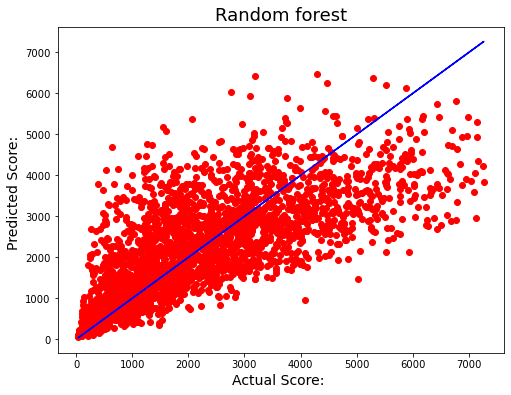

In [261]:
plt.figure(figsize = (8,6))
plt.scatter(x = y_test, y = pred_test_rfr, color = 'r')
plt.plot(y_test, y_test, color = 'b')
plt.xlabel('Actual Score: ', fontsize = 14)
plt.ylabel('Predicted Score: ', fontsize = 14)
plt.title('Random forest', fontsize = 18)
plt.show()

Regularization using GridSearchCV

In [262]:
from sklearn.model_selection import GridSearchCV
parameters = {'criterion':['mse', 'mae'], 'max_features':['auto', 'sqrt', 'log2']}
rfr = RandomForestRegressor()
gscv = GridSearchCV(rfr, parameters)
gscv.fit(x_train, y_train)

print(gscv.best_params_)

{'criterion': 'mae', 'max_features': 'sqrt'}


In [263]:
rfr_reg = RandomForestRegressor(criterion = 'mae', max_features = 'sqrt')
rfr_reg = RandomForestRegressor()
rfr_reg.fit(x_train, y_train)
rfr_reg.score(x_train, y_train)
predrfr_reg = rfr_reg.predict(x_test)
data = [predrfr_reg, y_test]
pd.DataFrame(data, index = ['Predicted', 'Actual'])

,0,1,2,3,4,5,6,7,8,9,...,2742,2743,2744,2745,2746,2747,2748,2749,2750,2751
Predicted,3745.304766,1472.81618,404.87298,3031.993278,2841.381396,1414.498758,2210.149732,4500.748078,952.500138,2673.413372,...,3306.06319,2513.887692,692.838138,2513.42829,2973.409536,234.022042,178.554244,765.044148,1303.609768,2622.972364
Actual,3984.147200,868.86900,493.35780,5448.907200,716.400800,1341.587000,2406.867000,5580.069800,918.804000,3289.052000,...,4655.27360,2490.092000,209.727000,4442.21760,3568.688000,58.590400,102.533200,1235.724800,1624.552000,4394.280000


In [264]:
print('Errors:')
print('\n')
print('Mean absolute error: ', mean_absolute_error(y_test,predrfr_reg))
print('Mean squared error: ', mean_squared_error(y_test,predrfr_reg))
print('Root mean squared error: ', np.sqrt(mean_squared_error(y_test,predrfr_reg)))
print('\n')
print('R2 Score: ', r2_score(y_test,predrfr_reg))


Errors:


Mean absolute error:  768.8044809171511
Mean squared error:  1131728.5997616036
Root mean squared error:  1063.8273355021497


R2 Score:  0.5473094869106152


In [266]:
joblib.dump(rfr_reg, 'bgdata.obj')

['bgdata.obj']

In [267]:
test=joblib.load('bgdata.obj')

In [268]:
testpred=test.predict(df_test)

In [270]:
pd.DataFrame(testpred)

,0
0,2071.669990
1,1316.626158
2,855.626238
3,2690.284744
4,5207.887600
...,...
5676,2126.225642
5677,2906.489978
5678,1956.732936
5679,3749.492648
